In [1]:
import sys
module_path = 'C:/Users/94735/OneDrive - UW-Madison/My Projects/CMT_and_inverse_design/Meta_SCMT'
sys.path.insert(1, module_path)
import Meta_SCMT
import numpy as np
import matplotlib.pyplot as plt

In [2]:
GP = {
    'dim' : 2, #dim : 1 or 2.
    'modes' : 1, #number of modes with in a single waveguide. modes <= 2 is usually good enough.
    'period' : 0.32,
    'res' : 20, #resolution within one period
    'downsample_ratio': 0.5, #between (0, 1] for the output periodic resolution, it will be int(round(downsample_ratio * res))
    'wh' : 0.6, #waveguide height
    'lams' : [0.66, 0.59, 0.532],
    'n_sub' : 1, #the refractive index of substrate.
    'n_wg' : 2.4,# the refractive index of waveguide
    'h_min' : 0.12, #h_min, and h_max define the range of the width of waveguide.
    'h_max' : 0.31,
    'dh' : 0.005, #the step size of h.
    'paths' : ["sim_cache_TiO2_lam660nm/", "sim_cache_TiO2_lam590nm/", "sim_cache_TiO2_lam532nm/"], #the inter state store path            
}
sim = Meta_SCMT.SimLam(**GP)

In [3]:
N = 30
NA = 0.8
prop_dis = 0.5 * N * GP['period'] * np.sqrt((1 - NA**2)/NA**2)
wgs = np.load("PBA_widths_N" + str(N) + "lam_590.npy")

Optimizing by devs: ['cuda']
dis model input generated.
coo_sparse generated.
dis model input generated.
coo_sparse generated.
dis model input generated.
coo_sparse generated.
initialized by loaded h_paras.


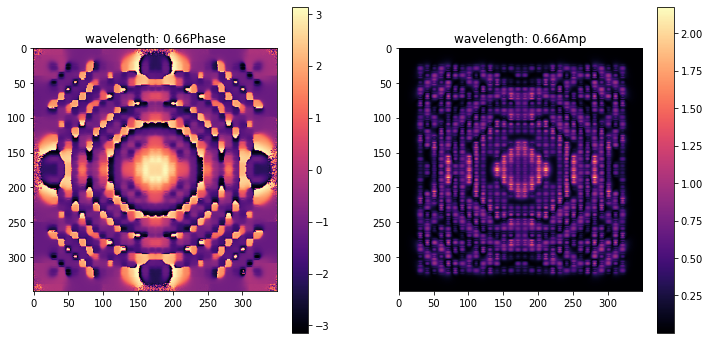

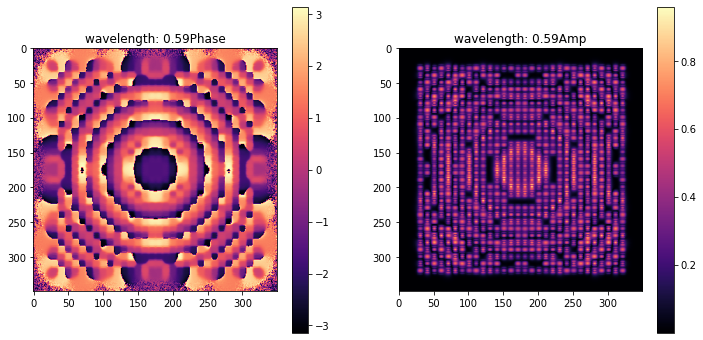

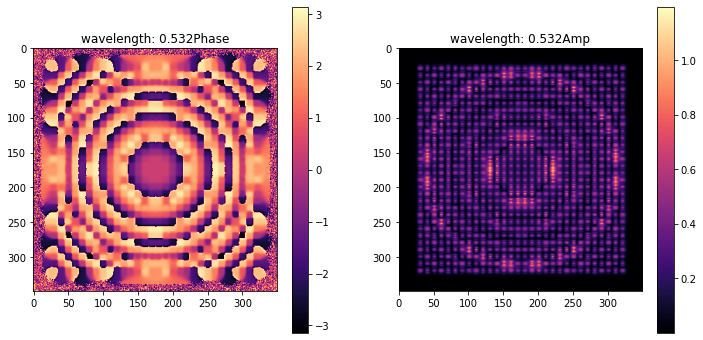

In [4]:
sim.scmt.init_model(N, prop_dis, APPROX = 1, COUPLING = True, init_hs= wgs, far_field= False)
E_out =sim.scmt.forward()
sim.scmt.vis_field(E_out)
E_scmt = E_out

Optimizing by devs: ['cuda']
dis model input generated.
coo_sparse generated.
dis model input generated.
coo_sparse generated.
dis model input generated.
coo_sparse generated.
Free space energy conservation normalization G_norm: 16396.08
f_kernel generated.
Free space energy conservation normalization G_norm: 20517.47
f_kernel generated.
Free space energy conservation normalization G_norm: 25235.07
f_kernel generated.
initialized by loaded h_paras.


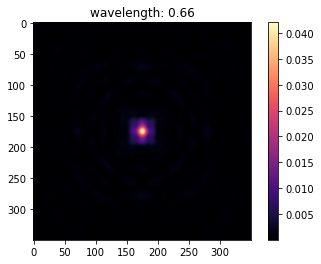

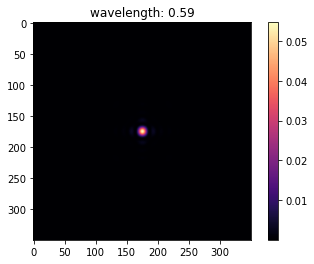

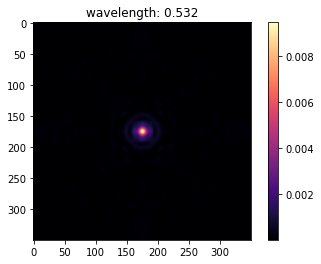

In [5]:
sim.scmt.init_model(N, prop_dis, APPROX = 1, COUPLING = True, init_hs= wgs, far_field= True)
E_out =sim.scmt.forward()
sim.scmt.vis_field(E_out)
E_scmt = E_out